## Emotion Detection of Text ( Classification of Emotion from Text)

* Text Classification
* Sentiment Analysis

In [1]:
### Loading packages
import pandas as pd
import numpy as np

In [2]:
### Load data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [4]:
### Text cleaning
import neattext.functions as nfx

In [5]:
### Loading the data set
df = pd.read_csv("/Users/Aceofrace/Desktop/data/emotiondata.csv")

In [6]:
### Preview 
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [7]:
# shaping
df.shape

(34792, 4)

In [8]:
# Data types
df.dtypes

Unnamed: 0     int64
Emotion       object
Text          object
Clean_Text    object
dtype: object

In [9]:
# checking missing values
df.isnull().sum()

Unnamed: 0      0
Emotion         0
Text            0
Clean_Text    466
dtype: int64

In [10]:
# value count of emotions
df["Emotion"].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:>

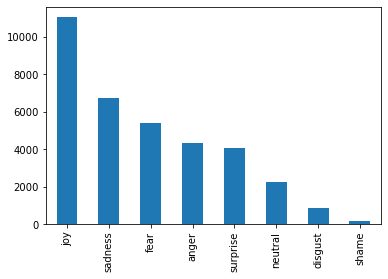

In [11]:
#### value count sof emotions in graph
df["Emotion"].value_counts().plot(kind='bar')

/Users/Aceofrace/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Emotion', ylabel='count'>

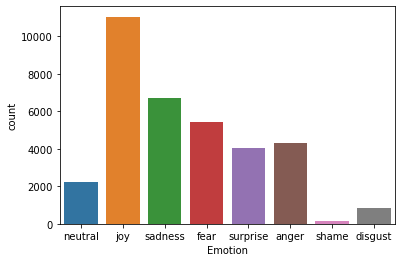

In [12]:
### using seaborn to plot (OLD METHOD)
sns.countplot(df['Emotion']) 

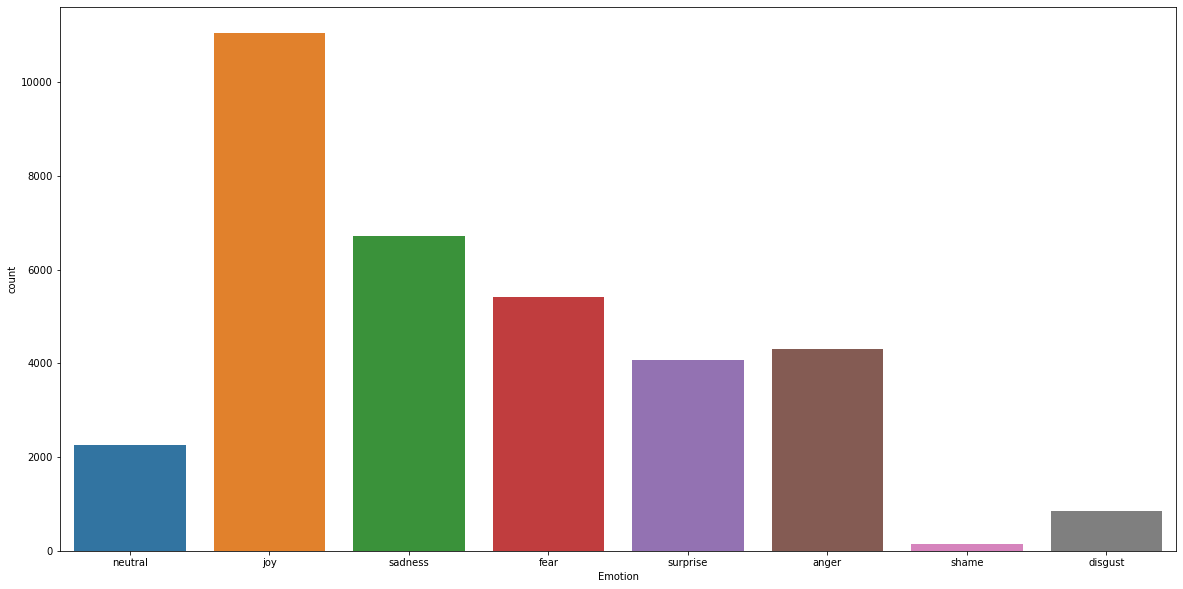

In [13]:
### using seaborn to plot (NEW METHOD)
plt.figure(figsize=(20,10))
sns.countplot(x ='Emotion',data=df)
plt.show()

### EDA - EXPLORATION
* Sentimental analysis
* Text cleaning
* Keyword extraction
  - keywords for each  emotion
  - Wordcloud

In [14]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [15]:
### Sentiment analysis
from textblob import TextBlob

In [16]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = "Neutral"
    return result

In [17]:
## test the function
get_sentiment("I love coding")

'Positive'

In [18]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [19]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text,Sentiment
0,0,neutral,Why ?,NaN,Neutral
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,Neutral
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,Negative
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,Positive
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,Neutral


In [20]:
### compare our emotion vs sentiment
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

In [21]:
### using seaborn to plot the comparison
sns.factorplot
sns.catplot

<function seaborn.categorical.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7fc66ad72d30>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

/Users/Aceofrace/Applications/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/Aceofrace/Applications/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


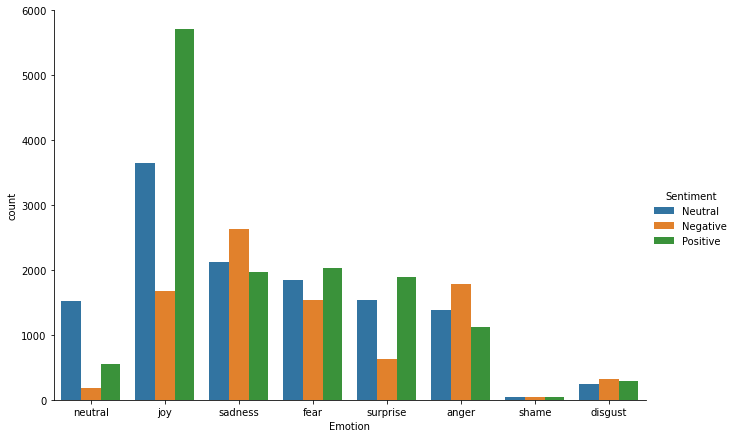

In [22]:
sns.factorplot(x='Emotion', hue='Sentiment', data=df, kind='count', size=6, aspect=1.5)

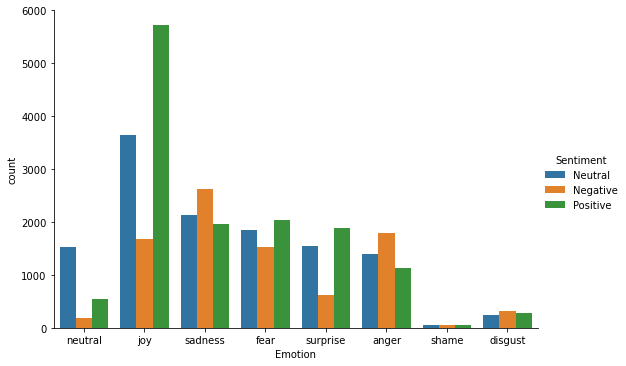

In [23]:
# Using catplot instead of factorplot
sns.catplot(x='Emotion', hue='Sentiment', data=df, kind='count', aspect=1.5)

### text cleaning
* remove noise
* stopwords
* special characters
* punctuations
* emojis



In [24]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [25]:
df["Text"]

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4        @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
                               ...                        
34787    @MichelGW have you gift! Hope you like it! It'...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Text, Length: 34792, dtype: object

In [26]:
df["Clean_Text"] = df["Text"].apply(nfx.remove_stopwords)

In [27]:
df["Clean_Text"] = df["Clean_Text"].apply(nfx.remove_userhandles)

In [28]:
df["Clean_Text"] = df["Clean_Text"].apply(nfx.remove_punctuations)

In [29]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


### keyword extraction
* extract most common words per class of emotion

In [30]:
from collections import Counter

In [31]:
def extract_keywords(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [32]:
#### list of emotions
emotion_list = df['Emotion'].unique().tolist()

In [33]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [34]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text'].tolist()

In [35]:
### joy doucment
joy_docx = ' '.join(joy_list)

In [36]:
joy_docx

'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness    ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french #fuckfrench GoodLet   fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  ’ ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome    brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class jamming

In [37]:
### extracting the keywords
keyword_joy = extract_keywords(joy_docx)

In [38]:
keyword_joy

{'day': 729,
 'amp': 678,
 'time': 602,
 'Im': 555,
 'work': 509,
 'like': 476,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'love': 393,
 'happy': 368,
 'good': 345,
 'night': 332,
 'got': 328,
 ':)': 311,
 'going': 304,
 'home': 302,
 'school': 297,
 'morning': 288,
 '2': 262,
 'joy': 257,
 'life': 251,
 'hours': 251,
 'week': 231,
 'feel': 227,
 'year': 225,
 'days': 208,
 'tonight': 205,
 'long': 204,
 'people': 201,
 'me': 196,
 'great': 194,
 'sleep': 185,
 'new': 181,
 'family': 181,
 's': 180,
 'God': 177,
 'know': 177,
 'hour': 172,
 'friend': 169,
 'felt': 167,
 'cant': 165,
 'it': 162,
 'feeling': 159,
 'RT': 159,
 'friends': 155,
 'think': 148,
 'excited': 145,
 'right': 142,
 'class': 141}

In [39]:
### plot 
def plot_most_common_words(mydict,emotion_name):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title('Plot of {} Most Common Keywords'.format(emotion_name))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

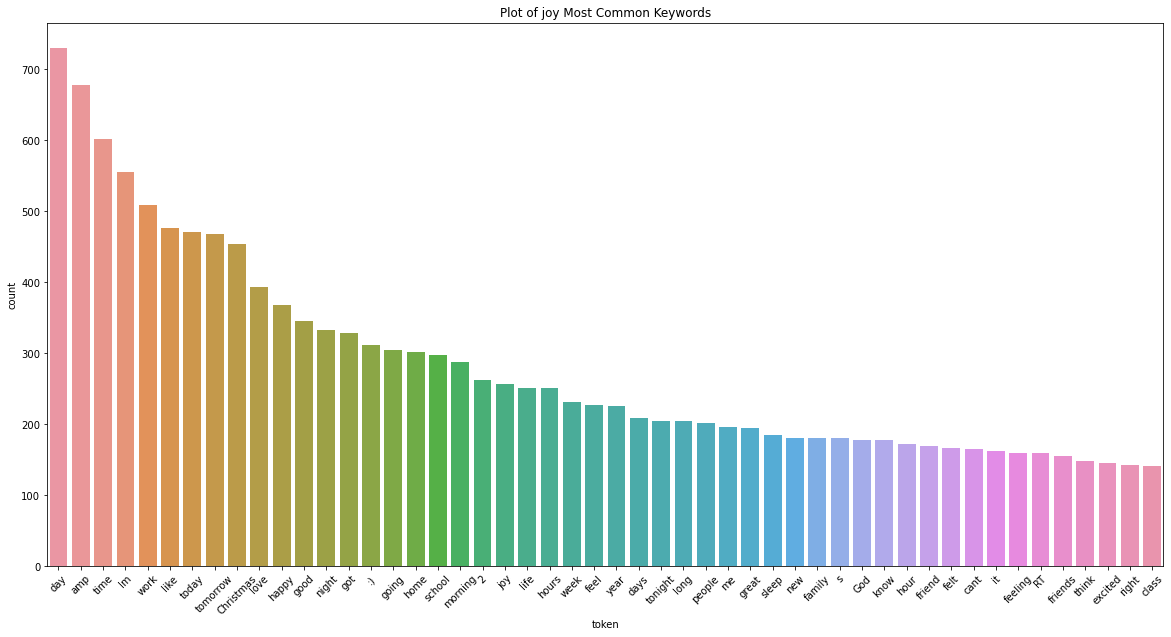

In [40]:
plot_most_common_words(keyword_joy,'joy')

In [41]:
surprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()
#Document
surprise_docx = ' '.join(surprise_list)
# Extract keywords
keyword_surprise = extract_keywords(surprise_docx)

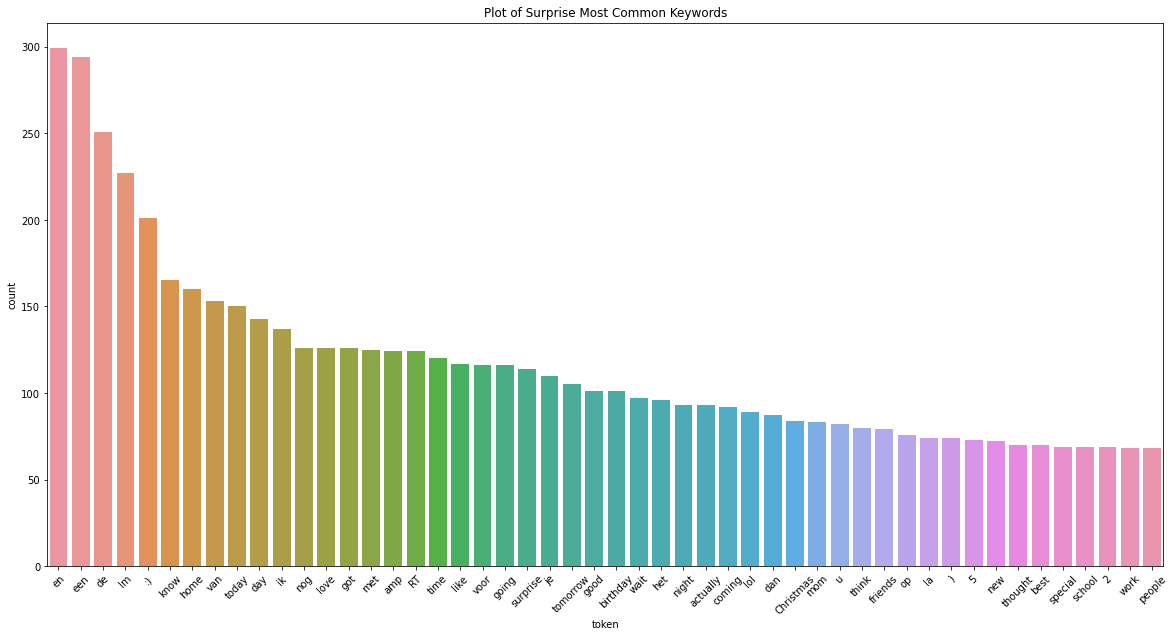

In [42]:
plot_most_common_words(keyword_surprise,"Surprise")

In [46]:
## word cloud
from wordcloud import WordCloud

In [59]:
def plot_wordcloud(docx):
    mywordcloud = Wordcloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()   

### Machine learning 
* Naive bayes
* LogisticRegression
* KNN
* DecisionTree

### Compare with SparkNLP/NLU John Snows Lab

In [63]:
### Load MACHINE LEARNING PACKAGES
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,plot_confusion_matrix

In [64]:
### Splitting the dataset
from sklearn.model_selection import train_test_split

In [65]:
### build fatures from our test
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [66]:
Xfeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_Text, Length: 34792, dtype: object

In [69]:
### Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [71]:
### Get features by name
cv.get_feature_names()


['00',
 '000',
 '000ème',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ème',
 '112',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '128600',
 '1295',
 '12days',
 '12hours',
 '12hr',
 '12hrstwi

In [74]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [75]:
### splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

In [76]:
### Building our model
### NV MODEL

nv_model= MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [77]:
### Accuracy of method 1
nv_model.score(X_test,y_test)

0.5642843456600881

In [78]:
### predictions
y_pred_for_nv = nv_model.predict(X_test)

In [79]:
y_pred_for_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

### make a single prediction
* vectorize our text
* applied our model

In [82]:
sample_text= ['I love coding a lot']

In [83]:
vect = cv.transform(sample_text).toarray()

In [84]:
### Make prediction
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [86]:
### checing the preiction probability(percentage)/confidence score
nv_model.predict_proba(vect)

array([[1.54720024e-02, 9.05555975e-04, 1.29850927e-01, 6.67897656e-01,
        4.00447733e-03, 1.45002866e-01, 5.29078799e-06, 3.68612247e-02]])

In [87]:
### get call class for our model
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [92]:
np.max(nv_model.predict_proba(vect))

0.6678976559794702

In [103]:
def predict_emotion(sample_text,model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect) 
    pred_percentage_for_all = dict(zip(model.classes_,pred_proba[0]))
    print('Prediction:{},Prediction Score:{}'.format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

In [104]:
predict_emotion(sample_text,nv_model)

Prediction:joy,Prediction Score:0.6678976559794702


{'anger': 0.015472002386676703,
 'disgust': 0.0009055559754479691,
 'fear': 0.1298509273655416,
 'joy': 0.6678976559794702,
 'neutral': 0.0040044773279240605,
 'sadness': 0.145002865517865,
 'shame': 5.290787988102783e-06,
 'surprise': 0.03686122465908696}

In [105]:
predict_emotion(["He hates running all day"],nv_model)

Prediction:joy,Prediction Score:0.9089665715897578


{'anger': 0.010366933571529213,
 'disgust': 0.0003195563339480684,
 'fear': 0.009997815369441347,
 'joy': 0.9089665715897578,
 'neutral': 5.800043787193291e-05,
 'sadness': 0.047719525231977804,
 'shame': 4.351322032698918e-07,
 'surprise': 0.022571162333268505}

### Model evaluation

In [106]:
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.64      0.49      0.56      1283
     disgust       0.53      0.03      0.06       292
        fear       0.75      0.60      0.67      1645
         joy       0.51      0.86      0.64      3311
     neutral       0.30      0.02      0.04       675
     sadness       0.56      0.54      0.55      2015
       shame       1.00      0.03      0.05        36
    surprise       0.61      0.27      0.38      1181

    accuracy                           0.56     10438
   macro avg       0.61      0.36      0.37     10438
weighted avg       0.57      0.56      0.53     10438



In [109]:
 ### confusion matrix
confusion_matrix(y_test,y_pred_for_nv)

array([[ 633,    0,   58,  373,    7,  199,    0,   13],
       [  31,   10,   25,  132,    2,   81,    0,   11],
       [  79,    2,  984,  353,    4,  160,    0,   63],
       [  76,    1,  100, 2848,    9,  204,    0,   73],
       [  20,    0,   17,  550,   14,   71,    0,    3],
       [  89,    1,   74,  726,    7, 1080,    0,   38],
       [   9,    0,    7,   13,    0,    5,    1,    1],
       [  49,    5,   47,  621,    4,  135,    0,  320]])

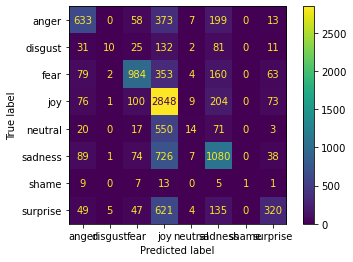

In [111]:
### plotting confusion learn using scikitlearn
plot_confusion_matrix(nv_model,X_test,y_test)

In [113]:
### save model
import joblib

In [115]:
model_file = open("emotion_classifier_nv_model_5_jan_2021.pkl","wb")
joblib.dump(nv_model,model_file)
model_file.close()

### model interpretation
* Eli5
* lime
* shap

In [117]:
### LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

/Users/Aceofrace/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [118]:
### Accuracy
lr_model.score(X_test,y_test)

0.622341444721211

In [119]:
### simple prediction
predict_emotion(sample_text,lr_model)

Prediction:joy,Prediction Score:0.5118369221954173


{'anger': 0.025125270544455413,
 'disgust': 0.010579236732428126,
 'fear': 0.04648519208077668,
 'joy': 0.5118369221954173,
 'neutral': 0.12537541127482466,
 'sadness': 0.1843372785916899,
 'shame': 0.0013300631015292436,
 'surprise': 0.09493062547887857}

In [124]:

pip install eli5

     |████████████████████████████████| 106 kB 2.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [126]:
### interpretting the model
import eli5

In [129]:
### showing the weights for each class/label
eli5.show_weights(lr_model,top=20)

In [132]:
class_names=ylabels.unique().tolist()

In [134]:
feature_names = cv.get_feature_names()

In [137]:
eli5.show_weights(lr_model,feature_names = feature_names,target_names=class_names)

In [138]:
### Thank you ###